<p><img style="float:right; margin:20px; padding:20px; max-height:290px" src="https://i.imgur.com/iViERCB.jpg"></p>
<p style="text-align:justify; background-color: #f2f2f2; box-shadow: 5px 5px 9px #888888; padding: 30px; margin: 30px;">
    <strong style="font-size: 18px; color: #333;">Many solutions use IDs in supervised learning, but beware: relying on them can cause data leakage if not shuffled. This may create the illusion of accuracy, but it's a trap! Embrace unsupervised learning with my hybrid model (Autoencoder + Classifier) for anomaly detection. Focus on real-world effectiveness, not just accuracy.</strong>
</p>


<div style="padding:20px; 
            color:#36FF00;
            margin:10px;
            font-size:200%;
            display:fill;
            text-align: center;
            border-radius:10px;
            border-style: solid;
            border-color: #36FF00;
            background-color:#000000;
            overflow:hidden;
            font-weight:500">INTRODUCTION</div>

#### **In the world of credit cards, keeping your money safe is a big deal. That's where credit card fraud detection comes in—like a superhero for your wallet. It uses smart technology and fancy computer programs to catch bad guys trying to use your card without permission. Think of it as your personal guard, making sure every transaction is legit and keeping your money secure. So, when you swipe that card, know that behind the scenes, professionals are working hard to keep your funds safe from the tricky folks out there.**

## **Dataset Description**
#### **This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities.**
## **Key Features**
#### **id: Unique identifier for each transaction.**
#### **V1-V28: Anonymized features representing various transaction attributes (e.g., time,         location, etc.)**
#### **Amount: The transaction amount.**
#### **Class: Binary label indicating whether the transaction is fraudulent (1) or not (0).**



#### <a id="top"></a>
# <div style="box-shadow: rgb(255,217,19) 0px 0px 20px 3px inset, rgb(255,255, 255) 10px -10px 5px -3px, rgb(31, 193, 27) 10px -10px, rgb(255, 255, 255) 20px -20px 10px -3px, rgb(60,121,245) 20px -20px, rgb(255, 255, 255) 30px -30px 15px -3px, rgb(255, 156, 85) 30px -30px, rgb(255, 255, 255) 40px -40px 0px -3px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(255, 85, 85);"><b>TABLE OF CONTENT</b></div>

<div style="background-color: rgba(60, 121, 245, 0.03); padding:30px; font-size:15px; font-family: consolas;">
<ul>
    <li><a href="#1" target="_self" rel=" noreferrer nofollow">1. Importing Some Libraries </a></li>
    <li><a href="#2" target="_self" rel=" noreferrer nofollow">2. Data Collection & Processing </a></li>
    <li><a href="#3" target="_self" rel=" noreferrer nofollow">3. ProfilReport </a></li>
    <li><a href="#4" target="_self" rel=" noreferrer nofollow">4. Normalization and Standarization </a></li>
    <li><a href="#5" target="_self" rel=" noreferrer nofollow">5. Hybrid Model</a></li>
    <li><a href="#6" target="_self" rel=" noreferrer nofollow">6. Evaluation</a></li>
    <li><a href="#7" target="_self" rel=" noreferrer nofollow">7. Confusion Matrix / Accuracy </a></li


</div>

# <div class="header2">📌 Notebook Objectives</div>
<div class="explain-box">
    This notebook <b>aims</b> to:
    <ul>
        <li><mark>Perform dataset exploration</mark> using various types of data visualization.</li>
        <li><mark>Build Deep learning model</mark> that can predict Fraud status.</li>
        <li><mark>Export prediction result on test data</mark> into files.</li>
       </ul>
</div>

#### <a id="1"></a>
# <div style="box-shadow: rgb(31 , 193 , 27)  0px 0px 20px 3px inset, rgb(255,255, 255) 10px -10px 5px -3px, rgb(0 , 121 ,245 ) 20px -10px, rgb(255, 255, 255) 20px -20px 10px -3px, rgb(255,85,85) 30px -20px, rgb(255, 255, 255) 30px -30px 15px -3px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(255, 85, 85);"><b>IMPORTING SOME LIBRARIES / DEPENDENCIES</b></div>

#### **DEPENDENCIES** 

In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 61.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.0.3 which is incompatible

#### **LIBRARIES**

In [2]:
# VISULIZATION
import seaborn as sns
import matplotlib.pyplot as plt

# 🚀 PYTORCH 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# ⚙️ DATA PROCESSING 
import pandas as pd
import os

#PROFILEREPORT
from ydata_profiling import ProfileReport

#SKLEARN
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, auc, f1_score

#WARNINGS
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

#### **Configuration settings, including the seed & 🌱 Function to set seed for random number generators, ensuring reproducibility**.

In [3]:
CONFIG = {
    'seed': 42  # Replace 42 with the seed value you wanna use
}

def set_seed(seed=42):
    torch.manual_seed(seed)  #  Set seed for PyTorch on CPU
    torch.cuda.manual_seed(seed)  #  Set seed for PyTorch on GPU
    
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)

# Set seed using the configured seed value
set_seed(CONFIG['seed']) 

#### <a id="2"></a>
# <div style="box-shadow: rgb(255 , 156 , 85) 0px 0px 20px 3px inset, rgb(255,255, 255) 10px -10px 5px -3px, rgb(127, 27, 193) 20px -10px, rgb(255, 255, 255) 20px -20px 10px -3px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(255, 85, 85);"><b>DATA COLLECTION / PRE-PROCESSING </b></div>


In [4]:
df = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")

#separate features and labels
X = df.drop(['Class', 'id'], axis=1).values
y = df["Class"].values

#### **CHECKING FOR NULL**

In [5]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### **LET'S SEE HOW OUR DATA LOOKS**

In [6]:
df.info()
print("\n")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


#### **CHECKING FOR ANY DUPLICATE**

In [7]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [id, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]


### **📚 OBSERVATIONS** :-
#### -> NO NULL VALUES.
#### -> NO DUPLICATE VALUES 
#### -> NO CATEGORICAL DATA

#### <a id="3"></a>
# <div style="box-shadow: rgb(255,217,19) 0px 0px 20px 3px inset, rgb(255,255, 255) 10px -10px 5px -3px, rgb(31, 193, 27) 20px -10px, rgb(255, 255, 255) 20px -20px 10px -3px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(255, 85, 85);"><b>NOW LET'S USE PROFILEREPORT 👽</b>
   

In [ ]:
ProfileReport(df)

#### **SPLITTING THE DATASET INTO TRAIN / TEST SETS**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **STANDARDIZE THE FEATURES**

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **CONVERTING TO PYTORCH TENSORS**

In [11]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  #YOU CAN ALSO USE BFLOAT16 , FLOAT16 FOR OPTIMIZATION
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

#### **CREATE A DATALOADER FOR TRANING**

In [12]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

## **AUTOENCODER MODEL**

In [13]:
class Autoencoder(nn.Module):
    """ This is autoencoder class
    -> Encoder:
        > Two fully connected layers with ReLU activation.
        > Input size reduced from input_size to 64, then to encoding_size.
     -> Decoder:
        > Two fully connected layers with ReLU activation.
        > Encoded input size expanded from encoding_size to 64, then to input_size.
        > Final layer uses Sigmoid activation. 
      -> Forward Method :
        > Takes input tensor x.
        > Passes input through the encoder.
        > The encoded representation is then passed through the decoder.
        > Returns the final output, representing the reconstructed input."""
    
    def __init__(self, input_size, encoding_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_size),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_size, 64),
            nn.ReLU(),
            nn.Linear(64, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

<p><img style="float:right; margin:20px; padding:20px; max-height:250px" src="https://i.imgur.com/I3WXXMP.png"></p>
<p style="text-align:justify; font-weight:bold;">
An autoencoder is a smart learner that simplifies information, like a friend who finds the most important parts of a story to understand it better.
</p>
<p style="text-align:justify; font-weight:bold;">
Imagine you have a set of numbers like [2, 4, 6, 8, 10], and you wanna simplify them. An autoencoder, in this case, would try to learn the pattern and represent these numbers in a more compressed way. After training, it might give output something like [3, 7, 9], capturing essential information in a simpler form.
</p>


## **CLASSIFIER MODEL**

In [14]:
class Classifier(nn.Module):
    """ -> Initialization:
            > Accepts input_size parameter.
            > Initializes a linear layer (fc) with input size input_size and output size 1.
            > Adds a Sigmoid activation (sigmoid).
         -> Forward Method:
            > Takes input tensor x.
            > Applies linear transformation through fc.
            > Applies Sigmoid activation using sigmoid.
            > Returns the final output, representing the probability of input belonging to the positive class.
    """
    def __init__(self, input_size):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

<p><img style="float:right; margin:10px; padding:10px; max-height:250px" src="https://i.imgur.com/f5CZELn.png"></p>
<p style="text-align:justify; font-weight:bold; font-size:25px;">
This is a basic classifier model with a linear layer and
a sigmoid activation function. 
It's designed for binary classification problems where
the goal is to predict whether the input belongs to one
of the two classes.
</p>


#### <a id="4"></a>
# <div style="box-shadow: rgb(193, 27, 138) 0px 0px 20px 3px inset, rgb(255,255, 255) 10px -10px 5px -3px, rgb(27, 160, 193) 20px -10px, rgb(255, 255, 255) 20px -20px 10px -3px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(255, 85, 85);"><b>HYBRID MODEL</b></div>

In [15]:
class HybridModel(nn.Module):
    """ -> Initialization:
              > Accepts an autoencoder and a classifier as parameters.
              > Initializes the HybridModel with these components.
        -> Forward Method:
              > Takes input tensor x.
              > Passes input through the encoder of the provided autoencoder.
              > The encoded representation is then passed through the classifier.
              > Returns the final output, combining feature learning from the autoencoder with classification from the classifier.
"""
    def __init__(self, autoencoder, classifier):
        super(HybridModel, self).__init__()
        self.autoencoder = autoencoder
        self.classifier = classifier

    def forward(self, x):
        x = self.autoencoder.encoder(x)
        x = self.classifier(x)
        return x

#### **INSTANTIATE THE MODELS**

In [16]:
input_size = X_train.shape[1]
encoding_size = 32  # You can adjust this based on your data
autoencoder = Autoencoder(input_size, encoding_size)
classifier = Classifier(encoding_size)
hybrid_model = HybridModel(autoencoder, classifier)

### **MODEL SUMMARY**

In [17]:
hybrid_model 

HybridModel(
  (autoencoder): Autoencoder(
    (encoder): Sequential(
      (0): Linear(in_features=29, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=32, bias=True)
      (3): ReLU()
    )
    (decoder): Sequential(
      (0): Linear(in_features=32, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=29, bias=True)
      (3): Sigmoid()
    )
  )
  (classifier): Classifier(
    (fc): Linear(in_features=32, out_features=1, bias=True)
    (sigmoid): Sigmoid()
  )
)

![wZNG5jf.png](https://i.imgur.com/wZNG5jf.png)

#### **LOSS AND OPTIMIZER**

In [18]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(hybrid_model.parameters(), lr=0.001)

#### **TRANING LOOP**

In [19]:
num_epochs = 10
for epoch in range(num_epochs):
    hybrid_model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = hybrid_model(batch_X)
        loss = criterion(outputs, batch_y.unsqueeze(1))
        loss.backward()
        optimizer.step()

#### <a id="6"></a>
# <div style="box-shadow: rgb(116, 193, 27) 0px 0px 30px 3px inset, rgb(255,255, 255) 10px -10px 5px -3px, rgb(31, 193, 27) 20px -10px, rgb(255, 255, 255) 40px -20px 10px -3px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(255, 85, 85);"><b>EVALUATION</b></div>

In [20]:
hybrid_model.eval()
with torch.no_grad():
    test_outputs = hybrid_model(X_test_tensor)
    precision, recall, _ = precision_recall_curve(y_test_tensor.numpy(), test_outputs.numpy())
    pr_auc = auc(recall, precision)
    f1 = f1_score(y_test_tensor.numpy(), (test_outputs.numpy() > 0.5).astype(float))

print(f'Area under the Precision-Recall curve: {pr_auc:.4f}')
print(f'F1-Score: {f1:.4f}')

Area under the Precision-Recall curve: 0.9999
F1-Score: 0.9994


#### <a id="7"></a>
# <div style="box-shadow: rgb(27, 146, 193) 0px 5px 40px 3px inset, rgb(255,255, 255) 10px -10px 5px -3px, rgb(31, 193, 27) 20px -10px, rgb(255, 255, 255) 20px -20px 10px -3px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(255, 85, 85);"><b>CONFUSION MATRIX & ACCURACY</b></div>

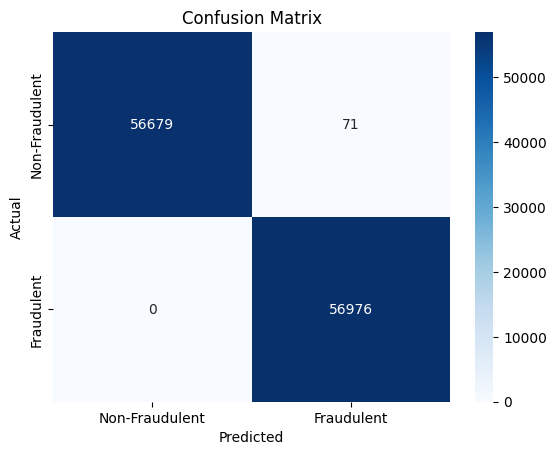

Accuracy: 99.94%


In [21]:
# Converting probabilities to binary predictions
predictions_binary = (test_outputs.numpy() > 0.5).astype(int)

# confusion matrix
conf_matrix = confusion_matrix(y_test_tensor.numpy(), predictions_binary)

# Displaying the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraudulent", "Fraudulent"], yticklabels=["Non-Fraudulent", "Fraudulent"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Accuracy
accuracy = accuracy_score(y_test_tensor.numpy(), predictions_binary)

print("Accuracy: {:.2%}".format(accuracy))

#### **SAVING THE MODEL**

In [22]:
model_path = '/kaggle/working/hybrid_model.pth'

torch.save(hybrid_model.state_dict(), model_path)

# <div style="box-shadow: rgba(240, 46, 170, 0.4) -5px 5px inset, rgba(240, 46, 170, 0.3) -10px 10px inset, rgba(240, 46, 170, 0.2) -15px 15px inset, rgba(240, 46, 170, 0.1) -20px 20px inset, rgba(240, 46, 170, 0.05) -25px 25px inset; padding:20px; font-size:30px; font-family: consolas; display:fill; border-radius:15px; color: rgba(240, 46, 170, 0.7)"> <b> 💻 Thank You!</b></div>